<a href="https://colab.research.google.com/github/lee-j-j/LJJ/blob/main/OpenCV_023_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/00_title.png"></center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/사물지능A

/content/drive/MyDrive/Colab Notebooks/사물지능A


<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[23차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ OCR 방법에 대해 이해할 수 있다<br><br>
○ Tessaract를 이용하여 문자를 인식할 수 있다<br><br>
○ EasyOCR 이용한 문자를 인식할 수 있다<br><br>        
○ 기타 OCR 라이브러리를 사용하여 문자을 인식할 수 있다     
        </font></td></tr>   
</table>

# OCR

- 참고 : https://meissa.tistory.com/80?category=962022

## 개념

- OCR  =Text detection + Text recognition

<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/23_ocr01.png" width=70%></center>

  - Text detection : Object detection의 문자 찾아내기 확장 버전(Segmentation 및 문자특성 고려)
    - 이미지 내에서 문자를 검출해낼 때엔 검출하기 위한 최소 단위를 설정
    - 단어 단위의 탐지 : Object detection의 Regression기반의 Detection방법
      - Anchor를 정의하고 단어의 유무, Bounding box의 크기를 추정해서 단어를 찾음
      - (예) TextBoxes 방법
    - 글자 단위의 방식 : 글자인 영역을 Segmentation하는 방법으로 접근
      - (예) PixelLink 방법
    - 두 가지 방법을 모두 활용한 방법이 있음
      - CRAFT : Character 단위로 문자의 위치를 찾아낸 뒤 이를 연결하는 방식을 Segmentation기반으로 구현한 방법
      
      - PMTD(Pyramid Mask Text Detector) : Mask-RCNN으로 Text영역 검출 → 단어의 사각형 배치 특성을 반영한 피라미드 형태의 Score map을 활용하여 기존의 부정확한 Mask 영역을 보완
        - Mask-RCNN의 경우 단어 영역이 Box head에 의해 빨간색으로 잡히면 우측 처럼 boundary를 모두 Text 영역으로 잡지만, PMTD는 이를 보완하여 전체 Text 영역을 검출
        
<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/23_ocr03.png" width=60%> </center>

  - Text recognition : 검출된 영역의 문자가 무엇인지를 인식해 내는 과정
    - Unsegmented Data : 분리에 드는 비용이 비싸거나 어려워 Segmentation이 되어있지 않은 데이터
      - 특징 : segment되어 있지 않은 하위데이터들끼리 시퀀스(sequence)를 이루고 있다는 점
    - CRNN : CNN으로 문자의 특성을 검출하고 Map-To-Sequence로 변환한 후에 Bidirectional LSTM으로 문자를 인식하는 방법

## Tessaract
- 1980년대 최초로 개발된 OCR 알고리즘 중 하나


- 다운로드 : https://github.com/UB-Mannheim/tesseract/wiki


- tesseract-ocr-w64-setup-v5.0.0-alpha.20201127.exe 파일 다운로드 및 설치

- Additional language data 체크

In [3]:
!pip install pytesseract

In [4]:
#실습
import cv2


In [5]:
#실습

In [6]:
#실습

In [7]:
#실습

### 한글 이미지 인식

In [8]:
#실습

In [9]:
#실습

### 포스터 한글 이미지 인식

In [10]:
#실습

In [11]:
#실습

### 번호판 인식

In [12]:
#실습

In [13]:
#실습

In [14]:
#실습

In [15]:
#실습

## EasyOCR
- 문자영역 인식, 문자 인식을 쉽게 할 수 있게 하는 파이썬 라이브러리
- 간단하고 직관적
- 80개 이상의 언어를 지원
- 문자 추출은 CRAFT를 문자 인식은 CRNN을 사용


- 수행 결과로 텍스트의 바운딩 박스 좌표와 읽은 문자를 반환


- 참고 : https://github.com/JaidedAI/EasyOCR

In [16]:
#!pip uninstall opencv-python
!pip install opencv-python==4.5.4.60 easyocr

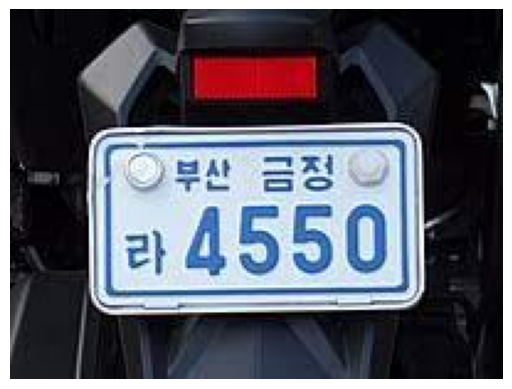

In [17]:
#실습
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/car4.jfif")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
#실습
import easyocr

# 언어 설정 (한글, 영어)
reader = easyocr.Reader(["ko","en"])

result = reader.readtext("./images/car4.jfif")

result


[([[62, 54], [136, 54], [136, 78], [62, 78]], '부산   금정', 0.9701361086381145),
 ([[44, 86], [68, 86], [68, 110], [44, 110]], '라', 0.9981654959020148),
 ([[65, 73], [159, 73], [159, 113], [65, 113]], '4550', 0.9999986290931702)]

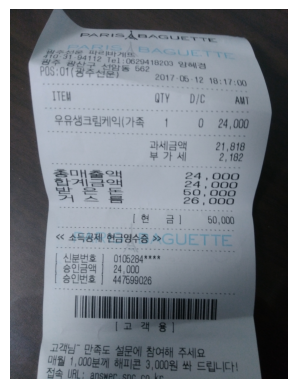

In [27]:
import cv2
import matplotlib.pyplot as plt

img2 = cv2.imread("./images/ocr_test.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img2)
plt.axis("off")
plt.show()

In [26]:
import easyocr

reader = easyocr.Reader(["ko","en"])

result = reader.readtext("./images/ocr_test.jpg")

result


[([[782, 233], [1931, 233], [1931, 358], [782, 358]],
  "P스'트스싱스e",
  0.015641954919640738),
 ([[2036, 307], [2218, 307], [2218, 372], [2036, 372]],
  '1',
  0.7869930135238725),
 ([[644, 376], [1264, 376], [1264, 478], [644, 478]],
  '~-발다 _ :  .',
  0.0005781111847133897),
 ([[361, 439], [837, 439], [837, 580], [361, 580]],
  '취히 숙응',
  0.019443609254802673),
 ([[866, 399], [2295, 399], [2295, 567], [866, 567]],
  'Y로바시뜨\' \'" \'',
  0.009515369606588742),
 ([[348, 539], [593, 539], [593, 651], [348, 651]], '감수', 0.28436525179713784),
 ([[736, 498], [1041, 498], [1041, 602], [736, 602]],
  '94112',
  0.899644230926861),
 ([[1067, 525], [1850, 525], [1850, 663], [1067, 663]],
  '(a1 ;0629418203}',
  0.18302293061596436),
 ([[304, 532], [1257, 532], [1257, 814], [304, 814]],
  'POS 여움추소틱',
  0.002934143185969498),
 ([[1021, 597], [1359, 597], [1359, 724], [1021, 724]],
  '설망동',
  0.06389461028335863),
 ([[1393, 626], [1580, 626], [1580, 718], [1393, 718]],
  '562',
  0.9772866494923176

## PaddleOCR

- 참고
  - https://learnopencv.com/optical-character-recognition-using-paddleocr/?ck_subscriber_id=1390420859
  - https://github.com/PaddlePaddle/PaddleOCR


- 텍스트 감지, 텍스트 방향 분류기 및 텍스트 인식을 제공
- PP-OCR 및 SRN, NRTR 등과 같은 최신 알고리즘을 포함하여 툴킷에 다양한 모델을 제공
- 80 개 이상의 언어를 지원


<center><img src="https://arome1004.cafe24.com/images/opencv/lecture_image/23_paddleocr1.png" width=80%> </center>

- 설치

In [ ]:
!conda create -n paddleocr python==3.7

In [ ]:
!activate paddleocr

In [ ]:
!git clone https://gitee.com/paddlepaddle/PaddleOCR.git

In [ ]:
!pip install -r ./PaddleOCR/requirements.txt

In [ ]:
# !pip install paddlepaddle-gpu paddleocr --user
!pip install paddlepaddle paddleocr --user

In [ ]:
!pip install jupyter

In [ ]:
!jupyter notebook

- 라이브러리 및 학습된 모델 로딩

In [ ]:
#실습

- 인식

In [ ]:
#실습

- 영수증 인식

In [ ]:
#실습

- ID 카드 인식

In [ ]:
#실습

- 손글씨 인식

In [ ]:
#실습

- 자동차 번호판

In [ ]:
#실습

- 도로 표지판

In [ ]:
#실습

- 곡선 텍스트

In [ ]:
#실습

## 구글 OCR API 활용

- 참고 : https://cloud.google.com/vision/docs/quickstart

## Naver 클로버 OCR

- 참고 : https://clova.ai/ocr?lang=ko

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[23차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>○            
        </font></td></tr>   
</table>